984
X =  [array([0.86675271, 0.90851372, 0.89297846, 0.92323942, 0.96752069,
       1.        , 0.96903365, 0.98799841, 0.9608633 , 0.97569092,
       0.99747986, 0.97347258, 0.96903365, 0.90931917, 0.87512492,
       0.91839889, 0.90790814, 0.9137581 , 0.92132275, 0.93867275,
       0.95914848, 0.9435154 , 0.95027261, 0.93877468, 0.91900235,
       0.92666905, 0.9114377 , 0.94068936, 0.9605615 , 0.93857282,
       0.93857282, 0.93171356, 0.9204155 , 0.91053033, 0.89176941,
       0.91799517, 0.9067989 , 0.90387293, 0.93342837, 0.91053033,
       0.89761925, 0.88511202, 0.89287865, 0.85414554, 0.87351203,
       0.83800682, 0.86039922, 0.86977862, 0.89035639, 0.92001178,
       0.93886242, 0.92295804, 0.92530295, 0.92204058, 0.92764786,
       0.91459814, 0.8823818 , 0.88401299, 0.87198277, 0.86759898])]
Y =  [0.8557727414333077]
X =  [array([0.86675271, 0.90851372, 0.89297846, 0.92323942, 0.96752069,
       1.        , 0.96903365, 0.98799841, 0.9608633 , 0.97569092,
       0.99747986,

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


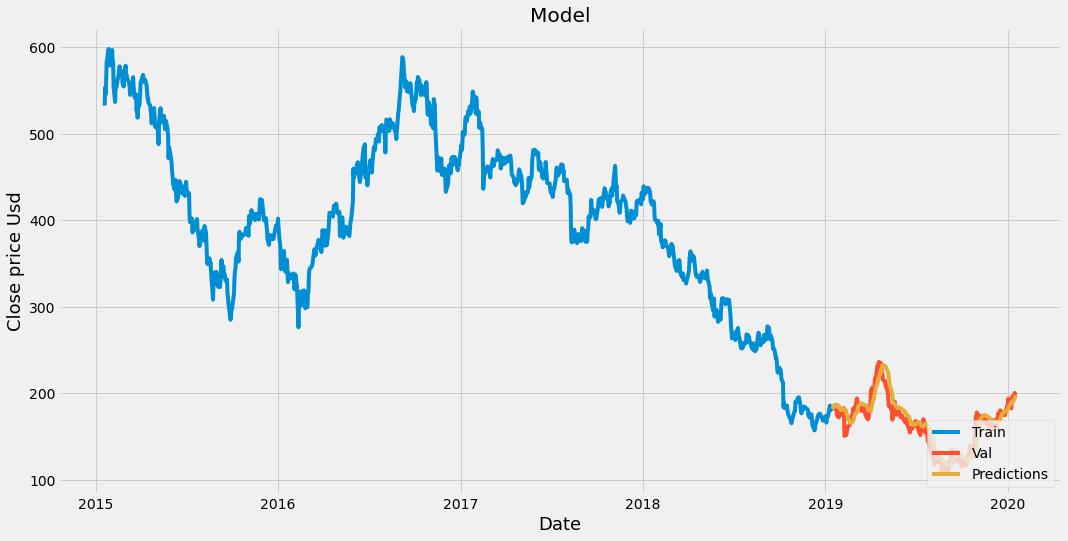

----------------------------------------------------------
Date
2020-01-16    197.550003
2020-01-17    197.300003
2020-01-20    195.000000
2020-01-21    191.399994
2020-01-22    185.600006
                 ...    
2020-05-12     86.199997
2020-05-13     87.199997
2020-05-14     83.800003
2020-05-15     84.349998
2020-05-18     80.650002
Name: Close, Length: 81, dtype: float64


In [13]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import pylab as plt

plt.style.use('fivethirtyeight')

df = web.DataReader('TATAMOTORS.NS',data_source='yahoo',start='2015-01-17',end='2020-01-18')
# print(df)

# df.shape

# plt.figure(figsize=(16,8))
# plt.title('Close Prise History')
# plt.plot(df['Close'],c='r')
# plt.xlabel('Date',fontsize=18)
# plt.ylabel('Close Price USD',fontsize=18)
# plt.show()

# filering data(Close price) from dataframe object
data = df.filter(['Close'])

# converting dataframe object's column into numpy array(ndarray)
dataset = data.values

training_dta_len = math.ceil(len(dataset) * .8)


# Minmaxscaler converts data into range of 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:training_dta_len,:]
print(len(train_data))
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <= 61 :
        print("X = ",x_train)
        print("Y = ",y_train)

# convert the x_train to numpy arrays
x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

#  Compile the model

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(x_train,y_train,batch_size=1,epochs=1)

# create testing data set

test_data = scaled_data[training_dta_len-60:,:]

x_test =[]
y_test = dataset[training_dta_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

#  ocnvert the data to numpy array

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

# let model predict value

predictions = model.predict(x_test)
predictions =scaler.inverse_transform(predictions)
# print(predictions)

#  get the root mean 
# ** use if prediction is not perfect
rmse = np.sqrt(np.mean(predictions - y_test) ++ 2) 

rmse

# plot the data

train = data[:training_dta_len]
valid = data[training_dta_len:]
valid['Predictions'] = predictions

valid

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close price Usd',fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc= 'lower right')
plt.show()

apple_quote = web.DataReader('TATAMOTORS.NS',data_source = 'yahoo' ,start = '2020-01-16',end = '2020-05-18')
print("----------------------------------------------------------")
print(apple_quote['Close'])



In [16]:
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values

last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)

X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)

print(pred_price)



[[85.65683]]


In [17]:
apple_quote2 = web.DataReader('TATAMOTORS.NS',data_source = 'yahoo' ,start = '2020-05-18',end = '2020-05-18')
print(apple_quote2['Close'])

Date
2020-05-18    80.650002
Name: Close, dtype: float64
